# Prepping Dataset

In [12]:
!pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-07-25 10:31:01.586704: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
import pathlib

data_dir = pathlib.Path('mri_classification/train').with_suffix('')

data_dir

PosixPath('mri_classification/train')

In [20]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

4737

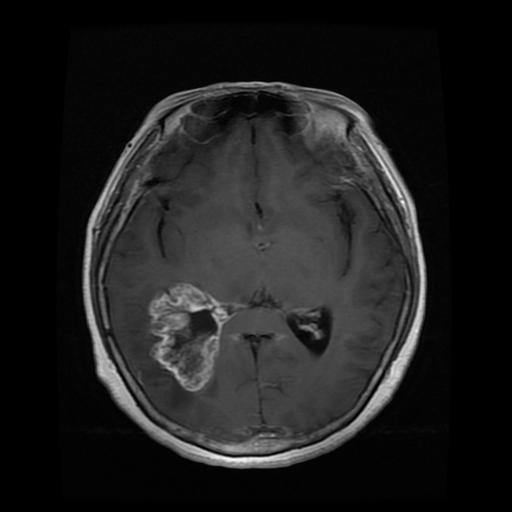

In [18]:
#image of brain with glioma
glioma = list(data_dir.glob('glioma/*'))
PIL.Image.open(str(glioma[0]))

In [22]:
#setting parameters
batch_size = 32
img_height = 180
img_width = 180

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'mri_classification/train',
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 4738 files belonging to 4 classes.


In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'mri_classification/val',
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 512 files belonging to 4 classes.


In [30]:
class_names = train_ds.class_names
class_names

['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Model

In [48]:
normalization_layer = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))

num_classes = len(class_names)

model = Sequential([
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compiling + Training

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,156 (15.22 MB)

 Trainable params: 3,989,156 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 54s 357ms/step - accuracy: 0.6047 - loss: 0.9483 - val_accuracy: 0.7910 - val_loss: 0.5186
Epoch 2/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 356ms/step - accuracy: 0.8640 - loss: 0.3531 - val_accuracy: 0.7188 - val_loss: 0.7433
Epoch 3/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 356ms/step - accuracy: 0.8958 - loss: 0.2674 - val_accuracy: 0.9121 - val_loss: 0.2877
Epoch 4/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 53s 357ms/step - accuracy: 0.9614 - loss: 0.1054 - val_accuracy: 0.9160 - val_loss: 0.2969
Epoch 5/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 54s 363ms/step - accuracy: 0.9765 - loss: 0.0615 - val_accuracy: 0.8984 - val_loss: 0.3033
